# Example that shows how to use the CoinClassifierClass 



<html>
<body>

<h2 style = "color:red"> Abstract: </h2>
<p> This example assumes that that 4 different type of models exist that are desgined to:</p>
<p> a) Classify different type of coins. </p>
<p> b) Distingish between 1 and 2 euro.. </p>
<p> c) Distingish between 50, 20 and 10 cents. </p>
<p> d) Distingish between 5, 2 and 1 cents. </p>

<p> The goal of this code is to show how to use the CoinClassifierClass</p>

</body>
</html>



# Same preprocessing/reading as in other codes... 

In [1]:
import os, cv2, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#Reading input data
def read_image(file_path, ROWS = 100, COLS = 100):
    img = cv2.imread(file_path) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Needed to obtain right ordering in colors between opencv and matplotlib
    #Do we want to resize?
    #return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)
    return img


def prep_data(images, ROWS = 100, COLS = 100, CHANNELS = 3):
    count = len(images)
    data = np.ndarray((count, ROWS, COLS, CHANNELS), dtype=np.uint8)

    for i, image_file in enumerate(images):
        if "jpg" in image_file:
            image = read_image(image_file)
            #print image.shape
            data[i] = image
            if i%1000 == 0: print('Processed {} of {}'.format(i, count))
        else:
            print image_file + " Not processed"
    
    return data
    
    
TRAIN_DIR = 'Augmented_and_Resized_RAW/All/'

images_full = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR) if '.jpg' in i]
random.shuffle(images_full)
n_images = len(images_full)
print("Number of images in full dataset "+str(n_images))
print("------------------------------------")


#Splitting of the input dataset into train, validation and test set.
train_to_full = 0.6 # Fraction of images used for training
validation_to_full = 0.8 # Fraction of images used for validation
train_to_full_index = int(n_images*train_to_full)
validation_to_full_index = int(n_images*validation_to_full)

#train_images = sorted(images_full[:train_to_full_index])
#validation_images =  sorted(images_full[train_to_full_index:validation_to_full_index])
#test_images =  sorted(images_full[validation_to_full_index:])

train_images = images_full[:train_to_full_index]
validation_images =  images_full[train_to_full_index:validation_to_full_index]
test_images =  images_full[validation_to_full_index:]

n_train_images = len(train_images)
n_validation_images = len(validation_images)
n_test_images = len(test_images)

print("Total number of train images "+str(n_train_images))
print("Total number of validation images "+str(n_validation_images))
print("Total number of test images "+str(n_test_images))
if n_train_images+n_validation_images+n_test_images - n_images != 0:
    print("Warning, there is a problem in the splitting of images")

train = prep_data(train_images)
validation = prep_data(validation_images)
test = prep_data(test_images)

#To make them easier to operate in future
train_images_name = [i.split('/')[-1] for i in train_images]
validation_images_name = [i.split('/')[-1] for i in validation_images]
test_images_name = [i.split('/')[-1] for i in test_images]
print len(train_images_name), len(validation_images_name), len(test_images_name) 

Number of images in full dataset 12552
------------------------------------
Total number of train images 7531
Total number of validation images 2510
Total number of test images 2511
Processed 0 of 7531
Processed 1000 of 7531
Processed 2000 of 7531
Processed 3000 of 7531
Processed 4000 of 7531
Processed 5000 of 7531
Processed 6000 of 7531
Processed 7000 of 7531
Processed 0 of 2510
Processed 1000 of 2510
Processed 2000 of 2510
Processed 0 of 2511
Processed 1000 of 2511
Processed 2000 of 2511
7531 2510 2511


(7531, 100, 100, 3)


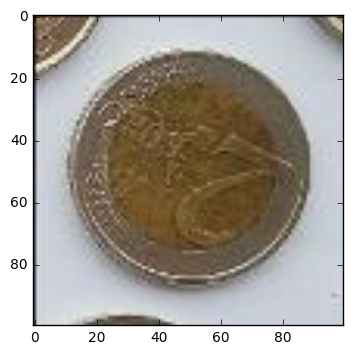

(1, 100, 100, 3)


In [2]:
print(train.shape)

##Getting a single component
single_test = test[0]
plt.imshow(single_test)
plt.show()

if single_test.ndim == 3:
    #Keras operates with 4D arrays...
    single_test= single_test[np.newaxis, ...]

print(single_test.shape) ## three component


In [3]:
from CoinClassifier import *

Classifier =  CoinClassifier("Model_Example_Coin_Classifier", #Name of TypeClassification model
                             "Model_Example_Coin_Classifier", #Name of OneVsTwoClassification model
                             "Model_Example_Coin_Classifier", #Name of GoldenClassification model
                             "Model_Example_Coin_Classifier", #Name of CopperClassfication model
                            )

ScoreCoinType, CoinType, ScoreCoinLabel, CoinLabel = Classifier.predictLabel(single_test)

Using TensorFlow backend.


Loaded model Model_Example_Coin_Classifier from disk 

(0.98243642, 2)
